Test out some features here

In [1]:
import pandas as pd
import numpy as np
fname = './districts.txt'
districts = pd.read_csv(fname,sep=" ", header = None)
districts.head()

,0,1
0,"Achham,",4586285.0
1,"Arghakhanchi,",4589557.0
2,"Baglung,",4588144.0
3,"Baitadi,",4586293.0
4,"Bajhang,",4586291.0


In [2]:
import getNodes
#dir()
#help(anchals)

In [3]:
getNodes.get_AnchalList()
#getNodes.get_DistList()

['Janakpur',
 'Bagmati',
 'Sagarmatha',
 'Gandaki',
 'Koshi',
 'Dhaulagiri',
 'Narayani',
 'Karnali',
 'Rapti',
 'Seti',
 'Bheri',
 'Lumbini',
 'Mechi',
 'Mahakali']

In [4]:
getNodes.get_DistName('4589418')

'Rautahat'

In [5]:
#Testing Testing
data1 = getNodes.get_DistData('Rautahat')

In [6]:
data1[0][1:10],data1[1][1:10]

(array([ 85.25384,  85.26056,  85.28069,  85.29177,  85.30522,  85.30705,
         85.3098 ,  85.31388,  85.31596]),
 array([ 26.75829,  26.75551,  26.75361,  26.75318,  26.75221,  26.75196,
         26.75103,  26.75015,  26.74952]))

Populating the interactive namespace from numpy and matplotlib


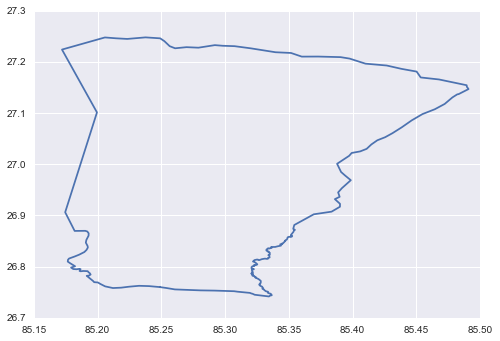

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(data1[0],data1[1])
show()

In [8]:
def distMaps():
    allDists = getNodes.get_DistList()
    for dist in allDists:        
        data = getNodes.get_DistData(dist)
    #    plt.plot(data[0],data[1])
        plt.fill(data[0],data[1],lw=2,color=np.random.rand(3,1))

    show()    

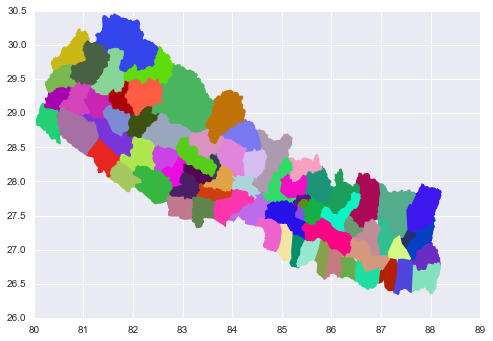

In [9]:
distMaps()

Get Dist population,fill district color per population size

In [10]:
#data taken from https://github.com/opennepal/odp-census
fname = './data/population_data.csv'
population = pd.read_csv(fname)
population.head()

,District,Zone,Geographical Region,Development Region,Category,Value
0,Taplejung,Mechi,Mountain,Eastern,Geographical Area (sq.km.),3646.0
1,Taplejung,Mechi,Mountain,Eastern,Holding Number,23444.0
2,Taplejung,Mechi,Mountain,Eastern,Holding Area (ha),22327.5
3,Taplejung,Mechi,Mountain,Eastern,Household,26509.0
4,Taplejung,Mechi,Mountain,Eastern,Population,127461.0


In [52]:
population.keys()

Index([u'District', u'Zone', u'Geographical Region', u'Development Region',
       u'Category ', u'Value'],
      dtype='object')

In [53]:
population.rename(columns={'Category ': 'Category'}, inplace=True)

In [11]:
allDists = getNodes.get_DistList()
#allDists

In [13]:
#Category has extra space
population['Category '].head()

0    Geographical Area (sq.km.)
1                Holding Number
2             Holding Area (ha)
3                     Household
4                    Population
Name: Category , dtype: object

In [14]:
abc = population[population['Category ']=='Population']
abc.head()

,District,Zone,Geographical Region,Development Region,Category,Value
4,Taplejung,Mechi,Mountain,Eastern,Population,127461.0
11,Panchthar,Mechi,Hill,Eastern,Population,191817.0
18,Ilam,Mechi,Hill,Eastern,Population,290254.0
25,Jhapa,Mechi,Terai,Eastern,Population,812650.0
32,Morang,Kosi,Terai,Eastern,Population,965370.0


In [15]:
dists = abc['District']
vals =  abc['Value']
#vals.plot()

In [16]:
dists.iloc(0)[0], vals.iloc(0)[0]

('Taplejung', 127461.0)

In [17]:
vals.describe()

count    7.500000e+01
mean     3.532601e+05
std      2.837822e+05
min      6.538000e+03
25%      1.655680e+05
50%      2.686130e+05
75%      4.917055e+05
max      1.744240e+06
Name: Value, dtype: float64

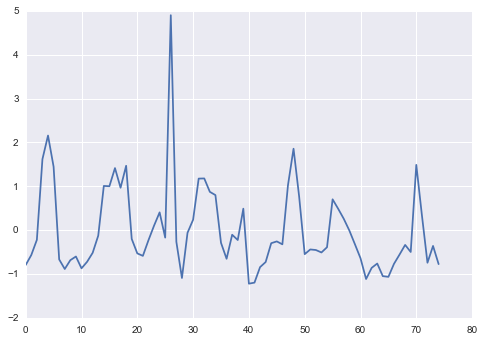

In [18]:
# For each district, normalize the number of population with the total population
# the idea is to fill the districts with color proportional to pop. size
pmean = vals.mean()
pstd = vals.std()
carray = []
for item in vals:
    carray.append((item - pmean)/pstd)
plt.plot(carray)    

In [19]:
def normalize(arr):
    pmean = arr.mean()
    pstd = arr.std()
    carray = []
    for item in arr:
        carray.append((item - pmean)/pstd)
    return carray

In [20]:
c_array = normalize(vals)

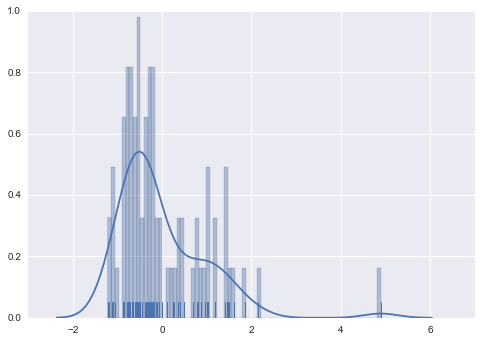

In [21]:
#make histogram
sns.distplot(c_array, bins=75, kde=True, rug=True);

In [22]:
# get normalized array and convert each point into %. 
# Here, 10 % means that 10 % of data lies below
def get_zarray(arr):
    max_v, min_v, diff_v = max(arr), min(arr), max(arr)- min(arr)
    z_array = []
    for val in arr:
        percnt = 100*(val+abs(min_v))/diff_v 
        z_array.append(percnt)
    return z_array

In [23]:
z_array = get_zarray(c_array)

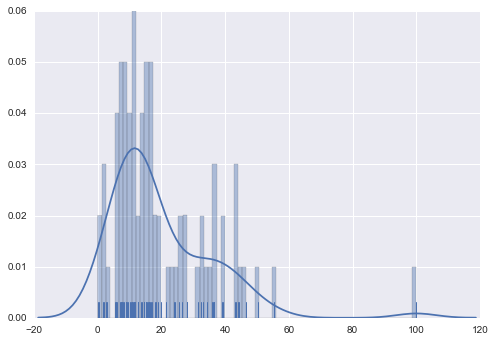

In [24]:
sns.distplot(z_array, bins=75, kde=True, rug=True);

In [29]:
#zones = abc.groupby('Zone').sum()
distVal = abc.groupby('District').sum()
distVal.head()

,Value
District,
Achham,257477.0
Arghakhanchi,197632.0
Baglung,268613.0
Baitadi,250898.0
Bajhang,195159.0


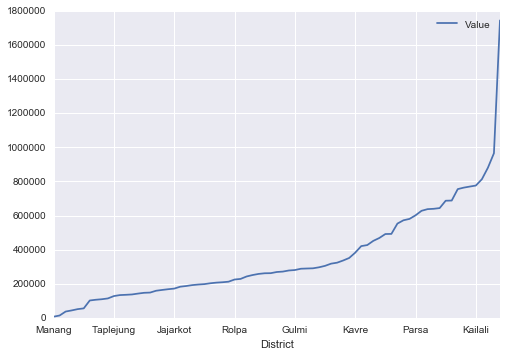

In [41]:
sortedDist = distVal.sort_values(by=['Value'],ascending=[True])
sortedDist.head()
sortedDist.plot()

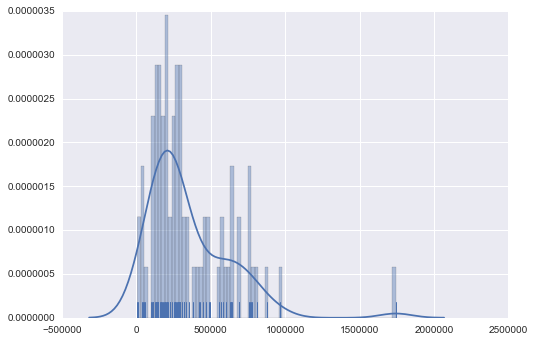

In [45]:
#histogram plot of sortedDist should look like the one above
# with c_array or z_array
sns.distplot(sortedDist, bins=75, kde=True, rug=True);

In [46]:
color_vals = ['g','b','c','m','y','y','purple','purple','firebrick','r','r','r']

In [47]:
def get_color(val):
    return color_vals[val / 9]

In [48]:
size(color_vals),100 / 9

(12, 11)

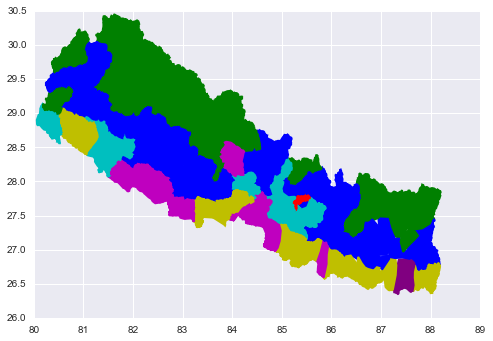

In [55]:
def mapNodes(allDists, arr):
    a = 0
    for dist in allDists:             
        if (dist == 'Sindhupalchok'):
            dist = 'Sindhupalchowk'
        if (dist == 'Kavre'):
            dist = 'Kavrepalanchok'
        if (dist == 'Chitawan'):
            dist = 'Chitwan'
        if (dist == 'Tanahu'):
            dist = 'Tanahun'
        if (dist == 'Kapilbastu'):
            dist = 'Kapilvastu'
        if (dist == 'Darchaula'):
            dist = 'Darchula' 
        data = getNodes.get_DistData(dist)
        plt.fill(data[0],data[1],lw=2,color = get_color(int(arr[a])))
        a = a + 1
    show() 
mapNodes(dists,z_array)    

Makes, sense. Kathmandu has the highest population density. Also, Pokhara, and few districts in Terai have fairly high population density.

Need a better way to make these heat maps

In [80]:
# What about anchals?
# get population by anchal, and make similar plot

zones = abc.groupby('Zone').sum()
zones.head()

,Value
Zone,
Bagmati,3843596.0
Bheri,1701767.0
Dhawalagiri,542296.0
Gandaki,1549857.0
Janakpur,2837481.0


In [99]:
zones['Value'][0]

3843596.0

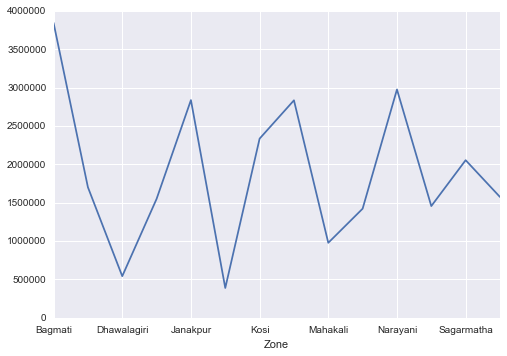

In [107]:
srs = zones['Value']
srs.plot()

In [108]:
srs.describe()

count    1.400000e+01
mean     1.892465e+06
std      9.833583e+05
min      3.887130e+05
25%      1.430687e+06
50%      1.638385e+06
75%      2.709721e+06
max      3.843596e+06
Name: Value, dtype: float64

In [110]:
c1_array = normalize(srs)
c1_array[0:5]

[1.9841510623434355,
 -0.19392480864979375,
 -1.3730179146897206,
 -0.34840563114429796,
 0.96100924992780712]

In [112]:
z1_array = get_zarray(c1_array)
z1_array[0:5]

[100.0,
 38.005744333454992,
 4.4453893228801098,
 33.608779226387696,
 70.878463901671907]

In [113]:
color_srs = ['g','b','c','m','y','y','purple','purple','firebrick','r','r','r']

In [114]:
# Need get_AnchalData @ getNodes.py